(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <a list of 40 Patch objects>)

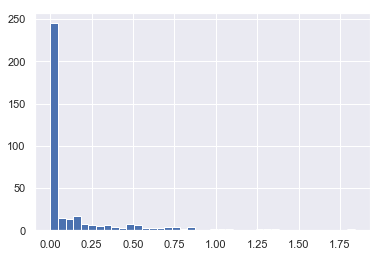

In [1]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('../data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254 
inches.shape

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40)

In [2]:
print("Days without rain = ", np.sum(inches == 0))
print("Days with rain = ", np.sum(inches != 0))
print("Days with rain more than 0.5 inches = ", np.sum(inches > 0.5))
print("Days with rain < 0.1 inches = ", np.sum((inches > 0) & (inches < 0.2)))

Days without rain =  215
Days with rain =  150
Days with rain more than 0.5 inches =  37
Days with rain < 0.1 inches =  75


In [3]:
# Masking technique on arrays - part I
# Demo how can we use masking
x = np.array([-12, -9, 0, 2, 5, 32, 17, -20, -5, 41, 24, 12])
x = x.reshape((3, 4))
print(x)
print("Check values greater than 15")
print(x>15)
# Collect values greater than 15 using the previous mask i.e. x > 15
maskedx = x[x > 15]
print("masked x:")
print(maskedx) # collects values of x where true (ignores values which are false)


[[-12  -9   0   2]
 [  5  32  17 -20]
 [ -5  41  24  12]]
Check values greater than 15
[[False False False False]
 [False  True  True False]
 [False  True  True False]]
masked x:
[32 17 41 24]


In [4]:
# Masking technique on arrays - part II
# Construct a mask of all rainy days
print("rainy precip values:")
print(inches)

rainy = (inches > 0)
print(rainy)

# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365)-172 < 90) & (np.arange(365)-172 > 0)
print(summer)

# Use precip values of rainy days for calculations like median, max, etc.
print(inches[rainy])
print("Median precip on rainy days in 2014 (inches): ", np.median(inches[rainy]))

# Use precip values of summer days for calculations like median, max, etc.
print("Median precip on summer days in 2014 (inches): ", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ", np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):", np.median(inches[rainy & ~summer]))


rainy precip values:
[0.         0.16141732 0.05905512 0.         0.         0.01181102
 0.48031496 0.38188976 0.22834646 0.16929134 0.83858268 0.05905512
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.01968504 0.         0.
 0.         0.         0.         0.3503937  0.8503937  0.
 0.09055118 0.07874016 0.         0.         0.         0.
 0.         0.         0.2007874  0.01968504 0.72047244 0.66929134
 0.18110236 0.07086614 0.37007874 0.46062992 1.03937008 0.57086614
 0.5984252  0.03937008 0.11811024 0.11023622 0.0984252  0.24015748
 0.51181102 0.01181102 0.         0.         0.         0.01968504
 0.7519685  0.42125984 0.6496063  1.83858268 0.11811024 0.
 1.27165354 0.16929134 0.74015748 0.         0.         0.01968504
 0.27165354 0.31889764 1.09055118 0.01181102 0.         0.01968504
 0.         0.         0.         0.         0.         0.16141732
 0.14173228 0.01181102 0.87007874 0.5511811  0.         0.
 0.         0.        

In [5]:
# Fancy Indexing - Pass an array of indices to extract elements a source array
x = np.random.randint(100, size=10)
print(x)

# we want to extract elements of x at the following indices
ind1 = [1, 3, 7]
x1 = x[ind1]
print(x1)

# With fancy indexing, the shape of the result reflects the shape of the index arrays
# rather than the shape of the array being indexed
# demo
ind2 = np.array([[1, 3],
                 [5, 7]])
x2 = x[ind2]
print(x2)

# Another example
y = np.arange(12).reshape((3, 4))
print("y:")
print(y)

row = np.array([0, 1, 2])
col = np.array([2, 1, 3])

newy = y[row, col]
print("new y:")
print(newy)

# Combined Indexing (i.e. combine fancy indexing and normal indexing)
# demo
print("Demo - Combined indexing:")
x = np.arange(12).reshape((3, 4))
print(x)

print("Fancy with normal indexing:")
print(x[2, [2, 0, 1]])

print("Fancy with slicing:")
print(x[1:, [2, 0, 1]])

# Modifying values with fancy indexing demo
x = np.arange(10)
print("Linear array source:")
print(x)

ind = np.array([2, 1, 8, 4])
print("Selected indices")
print(ind)

# modify source value directed by indices
x[ind] += 100
print("Modified source:")
print(x)

[21 72 57 61 91 13 99  9 72 23]
[72 61  9]
[[72 61]
 [13  9]]
y:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
new y:
[ 2  5 11]
Demo - Combined indexing:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Fancy with normal indexing:
[10  8  9]
Fancy with slicing:
[[ 6  4  5]
 [10  8  9]]
Linear array source:
[0 1 2 3 4 5 6 7 8 9]
Selected indices
[2 1 8 4]
Modified source:
[  0 101 102   3 104   5   6   7 108   9]
